## Reference file:
- https://vincent.codes.finance/posts/edgartools/
- https://pypi.org/project/edgartools/

## Edgar company search:
- https://www.sec.gov/edgar/searchedgar/companysearch
- Example search resuly: https://www.sec.gov/edgar/browse/?CIK=320193&owner=exclude
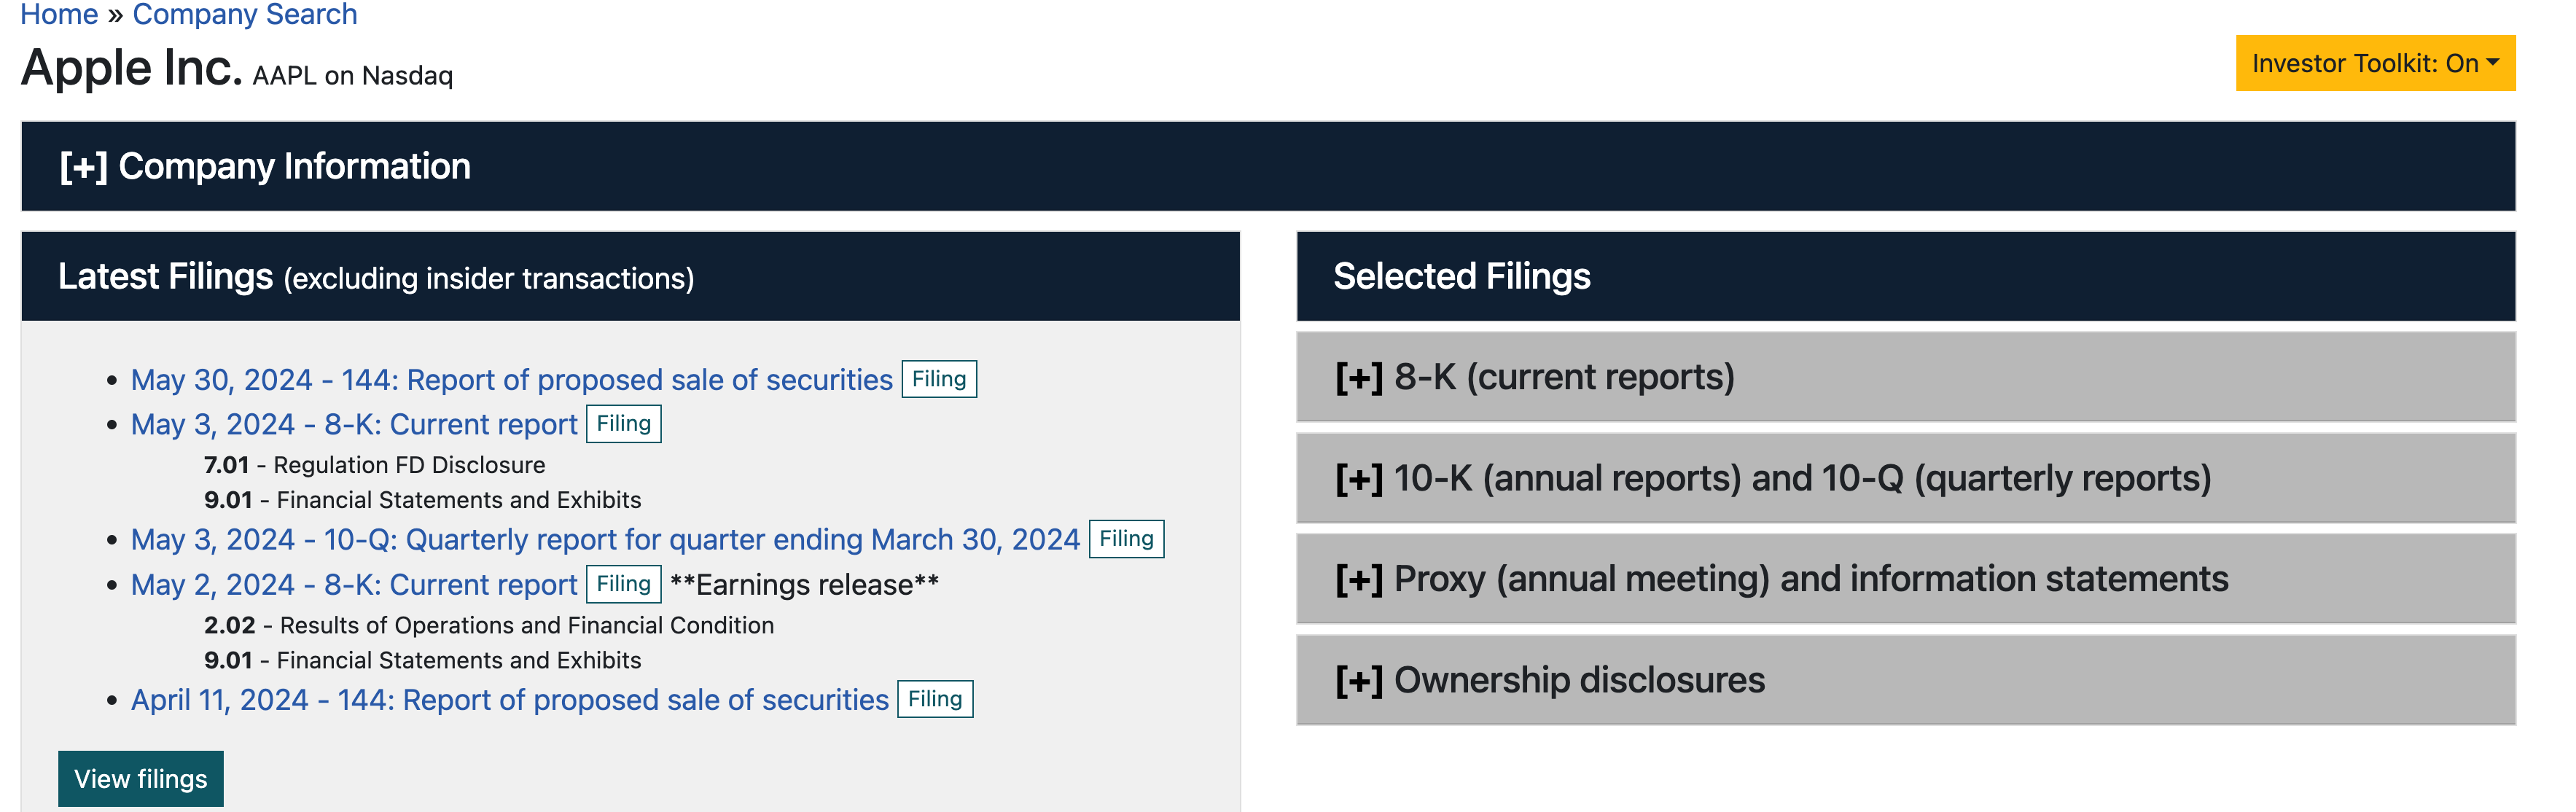

## Types of reports
- Form 10-K

The Form 10-K is an annual report that publicly traded companies must file with the SEC. This report provides a comprehensive overview of the company's business and financial condition and includes audited financial statements. The 10-K is more detailed than the annual report sent to shareholders. It includes information on the company’s history, organizational structure, executive compensation, equity, subsidiaries, and audited financial statements, among other details.

- Form 10-Q

The Form 10-Q is a quarterly report companies listed on stock exchanges must file with the SEC. Unlike the 10-K, the financial statements in the 10-Q are not required to be audited. The 10-Q provides a continuous view of the company’s financial position during the year. It includes unaudited financial statements and provides a continuing view of a company's financial position throughout the year.

- Form 8-K

The Form 8-K is known as a "current report" and is used by publicly traded companies to disclose any material events that shareholders should know about, including acquisitions, bankruptcy, the resignation of directors, or changes in the fiscal year and more. This report helps keep the public informed of events that may affect its decisions on that company's stock. Companies must file this report within four business days of the event.

- Form 4 (Statement of Changes in Beneficial Ownership)

Form 4 is used to report changes in beneficial ownership of shares by insiders. Insiders typically include officers, directors, and shareholders owning more than 10% of a company's equity securities. The form is a crucial tool for investors and regulators to monitor insider transactions, which can provide insights into insiders' perspectives on the company’s future prospects.

- Form SC 13D/G (Beneficial ownership)

Form SC 13D: Required from parties who might influence or control the company, or who have plans to change or influence the control of the company. It provides extensive details, including the purpose of the transactions and any plans or proposals that could affect the control of the company.

Form SC 13G: A shorter, less detailed form than SC 13D, filed by investors who have not acquired their shares for the purpose of changing or influencing the control of the company. This form is typically filed by passive investors.

- Form 13F (https://www.sec.gov/dera/data/form-13f)

13F: This form is focused solely on reporting by large investment managers about their investment holdings and is more about transparency in investment management activities rather than changes in control or influence over the companies.



## Basic Usage

In [2]:
from edgar import set_identity

set_identity("ucabkk1@ucl.ac.uk")

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

[15:16:28] INFO     Identity of the Edgar REST client set to [ucabkk1@ucl.ac.uk]                        core.py:148

In [3]:
from edgar import Company

apple = Company("AAPL")
apple

╭─────────────────────────────────────────────── Apple Inc. (AAPL) ───────────────────────────────────────────────╮
│                                                                                                                 │
│   CIK      Category                  Industry               Incorporated                                        │
│  ────────────────────────────────────────────────────────────────────────                                       │
│   320193   Large accelerated filer   Electronic Computers   California                                          │
│                                                                                                                 │
│ ╭───────── ✉ Mailing Address ──────────╮                 ╭──────── 🏢 Business Address ─────────╮               │
│ │ ONE APPLE PARK WAY                   │                 │ ONE APPLE PARK WAY                   │               │
│ │ CUPERTINO, CA 95014                  │                 │ CUPERTINO, C

In [4]:
# Check all the attribute that the company has:
print(dir(apple))

# to_dict attribute will contains all essential information about the company
apple.to_dict()


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rich__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_unicode_symbol', 'business_address', 'category', 'cik', 'description', 'display_name', 'ein', 'entity_type', 'exchanges', 'filings', 'financials', 'fiscal_year_end', 'flags', 'for_cik', 'for_ticker', 'former_names', 'get_facts', 'get_filings', 'industry', 'insider_transaction_for_issuer_exists', 'insider_transaction_for_owner_exists', 'investor_website', 'is_company', 'is_individual', 'mailing_address', 'name', 'phone', 'sic', 'sic_description', 'state_of_incorporation', 'state_of_incorporation_description', 'summary', 'ticker_display', 'ticker_info', 'tickers', 'to_dict', 'website']


{'cik': 320193,
 'name': 'Apple Inc.',
 'display_name': 'Apple Inc.',
 'is_company': True,
 'tickers': ['AAPL'],
 'exchanges': ['Nasdaq'],
 'sic': '3571',
 'industry': 'Electronic Computers',
 'category': 'Large accelerated filer',
 'fiscal_year_end': '0928',
 'entity_type': 'operating',
 'phone': '(408) 996-1010',
 'flags': '',
 'mailing_address': {'street1': 'ONE APPLE PARK WAY',
  'street2': None,
  'city': 'CUPERTINO',
  'state_or_country': 'CA',
  'zipcode': '95014',
  'state_or_country_desc': 'CA'},
 'business_address': {'street1': 'ONE APPLE PARK WAY',
  'street2': None,
  'city': 'CUPERTINO',
  'state_or_country': 'CA',
  'zipcode': '95014',
  'state_or_country_desc': 'CA'},
 'insider_transaction_for_owner_exists': False,
 'insider_transaction_for_issuer_exists': True,
 'ein': '942404110',
 'description': '',
 'website': '',
 'investor_website': '',
 'state_of_incorporation': 'CA',
 'state_of_incorporation_description': 'CA',
 'former_names': [{'name': 'APPLE INC',
   'from': '

In [5]:
apple.to_dict().keys()

dict_keys(['cik', 'name', 'display_name', 'is_company', 'tickers', 'exchanges', 'sic', 'industry', 'category', 'fiscal_year_end', 'entity_type', 'phone', 'flags', 'mailing_address', 'business_address', 'insider_transaction_for_owner_exists', 'insider_transaction_for_issuer_exists', 'ein', 'description', 'website', 'investor_website', 'state_of_incorporation', 'state_of_incorporation_description', 'former_names'])

In [6]:
company_facts = apple.get_facts()

company_facts.to_pandas()

,namespace,fact,val,accn,end,fy,fp,form,filed,frame,start
0,dei,EntityCommonStockSharesOutstanding,8.958168e+08,0001193125-09-153165,2009-06-27,2009,Q3,10-Q,2009-07-22,CY2009Q2I,None
1,dei,EntityCommonStockSharesOutstanding,9.006785e+08,0001193125-09-214859,2009-10-16,2009,FY,10-K,2009-10-27,None,None
2,dei,EntityCommonStockSharesOutstanding,9.006785e+08,0001193125-10-012091,2009-10-16,2009,FY,10-K/A,2010-01-25,CY2009Q3I,None
3,dei,EntityCommonStockSharesOutstanding,9.067946e+08,0001193125-10-012085,2010-01-15,2010,Q1,10-Q,2010-01-25,CY2009Q4I,None
4,dei,EntityCommonStockSharesOutstanding,9.099384e+08,0001193125-10-088957,2010-04-09,2010,Q2,10-Q,2010-04-21,CY2010Q1I,None
...,...,...,...,...,...,...,...,...,...,...,...
22572,us-gaap,IncrementalCommonSharesAttributableToShareBase...,6.687800e+07,0000320193-24-000006,2023-12-30,2024,Q1,10-Q,2024-02-02,CY2023Q4,2023-10-01
22573,us-gaap,IncrementalCommonSharesAttributableToShareBase...,6.286500e+07,0000320193-24-000069,2024-03-30,2024,Q2,10-Q,2024-05-03,None,2023-10-01
22574,us-gaap,IncrementalCommonSharesAttributableToShareBase...,5.885300e+07,0000320193-24-000069,2024-03-30,2024,Q2,10-Q,2024-05-03,CY2024Q1,2023-12-31
22575,us-gaap,OtherAssetsMiscellaneousNoncurrent,3.905300e+10,0000320193-23-000106,2022-09-24,2023,FY,10-K,2023-11-03,CY2022Q3I,None


Important: The financial data is taken from fiancial section in the latest 10K report.

To inspect the details of the financial information, there are several attributes to look for including 'balance_sheet', 'cash_flow_statement', 'income_Statement' and etc. You can call the to_dataframe function to convert to dataframe.

In [7]:
# Inspect methods and attributes of the financials object
print(dir(apple.financials))
apple.financials

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rich__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'balance_sheet', 'cash_flow_statement', 'from_xbrl', 'income_statement']


                                                                                                                   
                                     Balance Sheet                                                                 
                                                                                                                   
                                                      2023-09-30         2022-09-24                                
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               
    ASSETS:                                                                                                        
    CURRENT ASSETS:                                                                                                
      Cash and Cash Equivalents                   29,965,000,000     23,646,000,000                                
      Marketable Securities                       31,590,000,000     24,

In [8]:
apple.financials.balance_sheet.to_dataframe().head()

,Label,2023-09-30,2022-09-24
Fact,,,
CashAndCashEquivalentsAtCarryingValue,Cash and Cash Equivalents,29965000000,23646000000
MarketableSecuritiesCurrent,Marketable Securities,31590000000,24658000000
AccountsReceivableNetCurrent,"Accounts Receivable, net",29508000000,28184000000
NontradeReceivablesCurrent,Vendor non-trade Receivables,31477000000,32748000000
InventoryNet,Inventories,6331000000,4946000000


In [8]:
apple.former_names

[{'name': 'APPLE INC',
  'from': '2007-01-10T00:00:00.000Z',
  'to': '2019-08-05T00:00:00.000Z'},
 {'name': 'APPLE COMPUTER INC',
  'from': '1994-01-26T00:00:00.000Z',
  'to': '2007-01-04T00:00:00.000Z'},
 {'name': 'APPLE COMPUTER INC/ FA',
  'from': '1997-07-28T00:00:00.000Z',
  'to': '1997-07-28T00:00:00.000Z'}]

## Company Filings

Documentation: https://dgunning.github.io/edgartools/using-the-filings-api/

Commands to get different filings:
> filings = get_filings(2021) # Get filings for 2021

> filings = get_filings(2021, 4) # Get filings for 2021 Q4

> filings = get_filings(2021, [3,4]) # Get filings for 2021 Q3 and Q4

> filings = get_filings([2020, 2021]) # Get filings for 2020 and 2021

etc.


In [42]:
filings = apple.get_filings
# dir(apple.get_filings())
apple.get_filings().to_pandas()['form'].unique()

array(['4', '144', 'UPLOAD', '8-K', '10-Q', 'CORRESP', 'SD', '3',
       'SC 13G/A', 'PX14A6G', '25-NSE', 'DEFA14A', 'DEF 14A', '10-K',
       '424B2', 'FWP', '4/A', 'S-8', 'S-8 POS', 'PX14A6N', 'S-3ASR',
       'IRANNOTICE', 'CERT', '8-A12B', '3/A', '25', 'SC 13G', '8-K/A',
       'CERTNYS', 'NO ACT', 'PRE 14A', 'DFAN14A', 'DEFR14A', '10-K/A',
       '10-Q/A', 'SC TO-I/A', 'SC TO-I', 'NT 10-K', 'NT 10-Q', '10-K405',
       'S-4/A', '424B3', 'S-4', 'S-3/A', 'S-3', 'SC 13D', '424B5',
       'SC 13D/A'], dtype=object)

In [43]:
filings = apple.get_filings(form="10-Q")
filings

╭──────────────────────────────────────── Filings for Apple Inc. [320193] ────────────────────────────────────────╮
│                                                                                                                 │
│        form   filed        accession_number       xbrl                                                          │
│  ──────────────────────────────────────────────────────                                                         │
│   0    10-Q   2024-05-03   0000320193-24-000069   ✓                                                             │
│   1    10-Q   2024-02-02   0000320193-24-000006   ✓                                                             │
│   2    10-Q   2023-08-04   0000320193-23-000077   ✓                                                             │
│   3    10-Q   2023-05-05   0000320193-23-000064   ✓                                                             │
│   4    10-Q   2023-02-03   0000320193-23-000006   ✓                   

In [44]:
filings.to_pandas()

,accession_number,filing_date,reportDate,acceptanceDateTime,act,form,fileNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
0,0000320193-24-000069,2024-05-03,2024-03-30,2024-05-02T18:04:25.000Z,34,10-Q,001-36743,,5284139,1,1,aapl-20240330.htm,10-Q
1,0000320193-24-000006,2024-02-02,2023-12-30,2024-02-01T18:03:38.000Z,34,10-Q,001-36743,,4984121,1,1,aapl-20231230.htm,10-Q
2,0000320193-23-000077,2023-08-04,2023-07-01,2023-08-03T18:04:43.000Z,34,10-Q,001-36743,,5939898,1,1,aapl-20230701.htm,10-Q
3,0000320193-23-000064,2023-05-05,2023-04-01,2023-05-04T18:03:52.000Z,34,10-Q,001-36743,,6314786,1,1,aapl-20230401.htm,10-Q
4,0000320193-23-000006,2023-02-03,2022-12-31,2023-02-02T18:01:30.000Z,34,10-Q,001-36743,,5915088,1,1,aapl-20221231.htm,10-Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0000320193-95-000011,1995-08-11,1995-06-30,1995-08-11T00:00:00.000Z,,10-Q,000-10030,,213500,0,0,,
87,0000320193-95-000008,1995-05-15,1995-03-31,1995-05-15T00:00:00.000Z,,10-Q,000-10030,,111162,0,0,,
88,0000320193-95-000003,1995-02-09,1994-12-30,1995-02-09T00:00:00.000Z,,10-Q,000-10030,,132577,0,0,,
89,0000320193-94-000013,1994-08-12,1994-07-01,1994-08-12T00:00:00.000Z,,10-Q,000-10030,,138354,0,0,,


### Accessing Filling Data
Beyond metadata, edgartools facilitates downloading and accessing the content of filings. Let’s work with the latest filing from the list we retrieved earlier.

In [39]:
latest_10q = filings.latest()
latest_10q

╭─────────────────────────────────────────── Apple Inc. [320193] 4 🎫 ────────────────────────────────────────────╮
│ ╭──────────────────────┬────────────╮                                                                           │
│ │ 0000320193-24-000075 │ 2024-06-03 │                                                                           │
│ ╰──────────────────────┴────────────╯                                                                           │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────╮         │
│ │ Links: 🏠 Homepage 📄 Primary Document 📜 Full Submission Text                                      │         │
│ ├─────────────────────────────────────────────────────────────────────────────────────────────────────┤         │
│ │ 🏠 https://sec.gov/Archives/edgar/data/320193/0000320193-24-000075-index.html                       │         │
│ │ 📄 https://sec.gov/Archives/edgar/data/320193/000032019324000075/xslF345X0

In [37]:
# latest_10q.view()

To download the filing content, you can use the obj() method, which in this case will return a TenQ object. This object contains the filing’s content.

According to https://www.sec.gov/Archives/edgar/data/320193/000032019324000069/aapl-20240330.htm#idaed8f90d5814c63940b866deda643e7_115

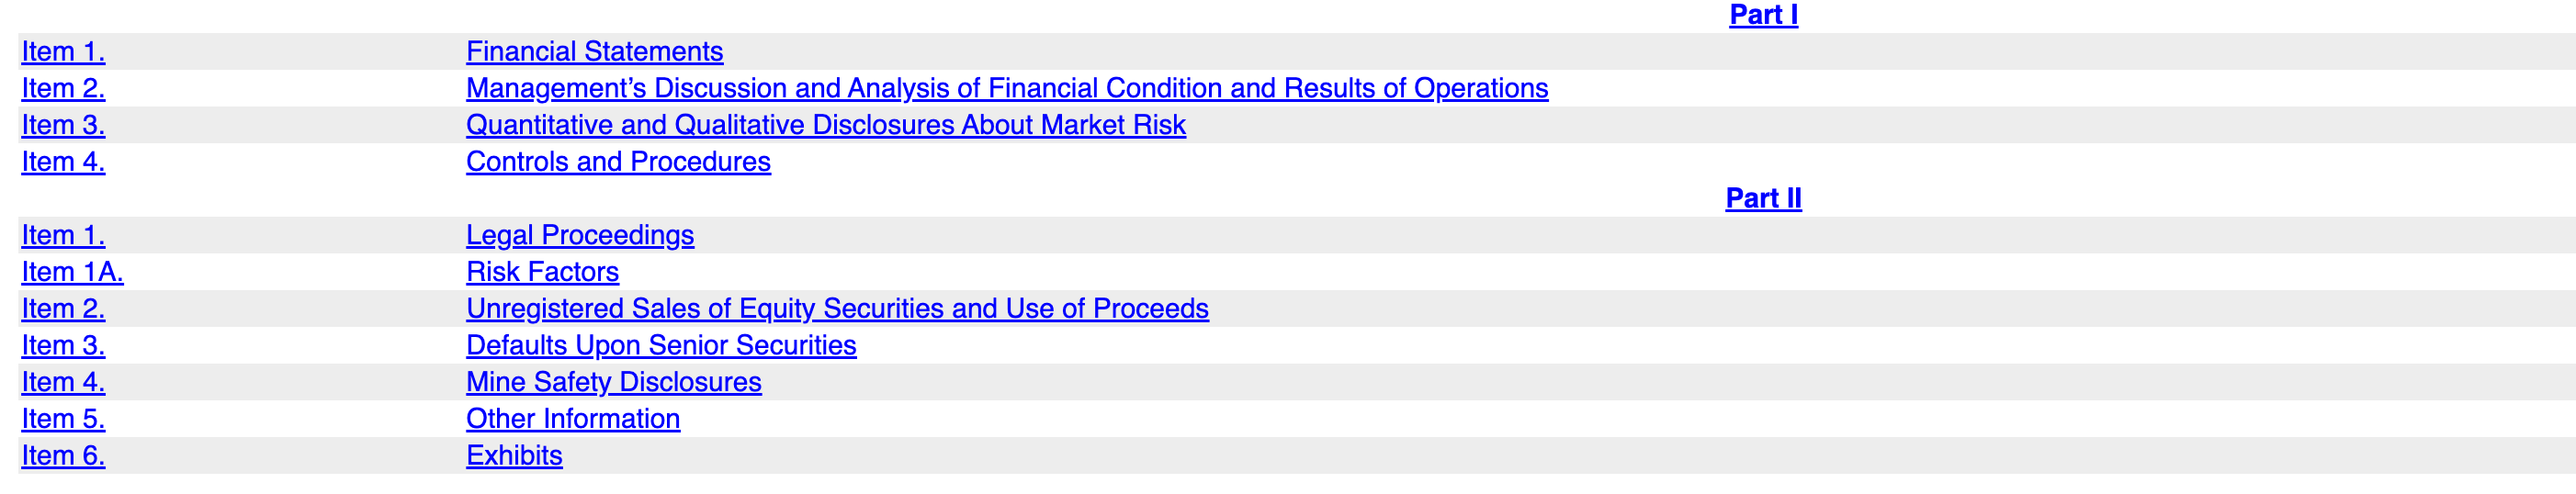

Note: Item 1 can access both financial statements and legal proceedings.

In [40]:
tenq = latest_10q.obj()
print(tenq.items)
print(tenq['Item 1'])

/Users/chenkangan/Documents/UCL DSML/Thesis/project/ucl_project/lib/python3.10/site-packages/edgar/ownership.py:769: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  transaction_df[column] = pd.to_numeric(transaction_df[column], errors="ignore")
/Users/chenkangan/Documents/UCL DSML/Thesis/project/ucl_project/lib/python3.10/site-packages/edgar/ownership.py:718: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  holdings_df['Shares'] = pd.to_numeric(holdings_df['Shares'], errors="ignore")


AttributeError: 'Form4' object has no attribute 'items'

In [31]:
# Instead of accessing each item 1 of the tenq report to get the financials, you can also just use tenq.financials
tenq.financials

                                                                                                                   
                           Balance Sheet                                                                           
                                                                                                                   
                                                      2024-03-30                                                   
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                                                  
    ASSETS:                                                                                                        
    CURRENT ASSETS:                                                                                                
      Cash and Cash Equivalents                   32,695,000,000                                                   
      Marketable Securities                       34,455,000,000        

In [35]:
tenq.financials.balance_sheet.to_dataframe().head()

,Label,2024-03-30
Fact,,
CashAndCashEquivalentsAtCarryingValue,Cash and Cash Equivalents,32695000000
MarketableSecuritiesCurrent,Marketable Securities,34455000000
AccountsReceivableNetCurrent,"Accounts Receivable, net",21837000000
NontradeReceivablesCurrent,Vendor non-trade Receivables,19313000000
InventoryNet,Inventories,6232000000


In [11]:
# Explore 10K report
filings = apple.get_filings(form="10-K")
latest_10k = filings.latest()

In [12]:
tenk = latest_10k.obj()
print(tenk.items)
print(tenk['Item 1'])

['Item 1', 'Item 1A', 'Item 1B', 'Item 1C', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 7A', 'Item 8', 'Item 9', 'Item 9A', 'Item 9B', 'Item 9C', 'Item 10', 'Item 11', 'Item 12', 'Item 13', 'Item 14', 'Item 15', 'Item 16']
Item 1.    Business
Company Background
The Company designs, manufactures and markets smartphones, personal computers, tablets, wearables and accessories, and sells a variety of related services. The Company’s fiscal year is the 52- or 53-week period that ends on the last Saturday of September.
Products
iPhone
iPhone® is the Company’s line of smartphones based on its iOS operating system. The iPhone line includes iPhone 15 Pro, iPhone 15, iPhone 14, iPhone 13 and iPhone SE®.
Mac
Mac® is the Company’s line of personal computers based on its macOS® operating system. The Mac line includes laptops MacBook Air® and MacBook Pro®, as well as desktops iMac®, Mac mini®, Mac Studio® and Mac Pro®.
iPad
iPad® is the Company’s line of multipurpose tablets bas

## Explore more companies

In [42]:
# import modules
import requests
import pandas as pd
from neo4j_utility import *
from edgar_utility import *

# create request header
headers = {'User-Agent': "ucabkk1@ucl.ac.uk"}

# get all companies data
companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers=headers
    )

# dictionary to dataframe
companyData = pd.DataFrame.from_dict(companyTickers.json(),
                                     orient='index')

# # add leading zeros to CIK
# companyData['cik_str'] = companyData['cik_str'].astype(
#                            str).str.zfill(10)

companyData.head()

,cik_str,ticker,title
0,789019,MSFT,MICROSOFT CORP
1,320193,AAPL,Apple Inc.
2,1045810,NVDA,NVIDIA CORP
3,1652044,GOOGL,Alphabet Inc.
4,1018724,AMZN,AMAZON COM INC


In [15]:
company = Company("789019")
company.to_dict()

{'cik': 789019,
 'name': 'MICROSOFT CORP',
 'display_name': 'MICROSOFT CORP',
 'is_company': True,
 'tickers': ['MSFT'],
 'exchanges': ['Nasdaq'],
 'sic': '7372',
 'industry': 'Services-Prepackaged Software',
 'category': 'Large accelerated filer',
 'fiscal_year_end': '0630',
 'entity_type': 'operating',
 'phone': '425-882-8080',
 'flags': '',
 'mailing_address': {'street1': 'ONE MICROSOFT WAY',
  'street2': None,
  'city': 'REDMOND',
  'state_or_country': 'WA',
  'zipcode': '98052-6399',
  'state_or_country_desc': 'WA'},
 'business_address': {'street1': 'ONE MICROSOFT WAY',
  'street2': None,
  'city': 'REDMOND',
  'state_or_country': 'WA',
  'zipcode': '98052-6399',
  'state_or_country_desc': 'WA'},
 'insider_transaction_for_owner_exists': True,
 'insider_transaction_for_issuer_exists': True,
 'ein': '911144442',
 'description': '',
 'website': '',
 'investor_website': '',
 'state_of_incorporation': 'WA',
 'state_of_incorporation_description': 'WA',
 'former_names': []}

In [38]:
select_company = companyData.iloc[:5]

In [39]:
for cik in list(select_company['cik_str']):
    company_info, _ = get_company_info_from_cik(cik)
    print(dict_to_cypher_create_node(company_info, 'Company'))


CREATE (:Company {cik: 789019, name: 'MICROSOFT CORP', display_name: 'MICROSOFT CORP', is_company: true, tickers: '["MSFT"]', exchanges: '["Nasdaq"]', sic: '7372', industry: 'Services-Prepackaged Software', category: 'Large accelerated filer', fiscal_year_end: '0630', entity_type: 'operating', phone: '425-882-8080', flags: '', mailing_address: '{"street1": "ONE MICROSOFT WAY", "street2": null, "city": "REDMOND", "state_or_country": "WA", "zipcode": "98052-6399", "state_or_country_desc": "WA"}', business_address: '{"street1": "ONE MICROSOFT WAY", "street2": null, "city": "REDMOND", "state_or_country": "WA", "zipcode": "98052-6399", "state_or_country_desc": "WA"}', insider_transaction_for_owner_exists: true, insider_transaction_for_issuer_exists: true, ein: '911144442', description: '', website: '', investor_website: '', state_of_incorporation: 'WA', state_of_incorporation_description: 'WA', former_names: '[]'})
CREATE (:Company {cik: 320193, name: 'Apple Inc.', display_name: 'Apple Inc.

In [40]:
company_info, company = get_company_info_from_cik('1652044')
company_info

{'cik': 1652044,
 'name': 'Alphabet Inc.',
 'display_name': 'Alphabet Inc.',
 'is_company': True,
 'tickers': ['GOOGL', 'GOOG'],
 'exchanges': ['Nasdaq', 'Nasdaq'],
 'sic': '7370',
 'industry': 'Services-Computer Programming, Data Processing, Etc.',
 'category': 'Large accelerated filer',
 'fiscal_year_end': '1231',
 'entity_type': 'operating',
 'phone': '650-253-0000',
 'flags': '',
 'mailing_address': {'street1': '1600 AMPHITHEATRE PARKWAY',
  'street2': None,
  'city': 'MOUNTAIN VIEW',
  'state_or_country': 'CA',
  'zipcode': '94043',
  'state_or_country_desc': 'CA'},
 'business_address': {'street1': '1600 AMPHITHEATRE PARKWAY',
  'street2': None,
  'city': 'MOUNTAIN VIEW',
  'state_or_country': 'CA',
  'zipcode': '94043',
  'state_or_country_desc': 'CA'},
 'insider_transaction_for_owner_exists': True,
 'insider_transaction_for_issuer_exists': True,
 'ein': '611767919',
 'description': '',
 'website': '',
 'investor_website': '',
 'state_of_incorporation': 'DE',
 'state_of_incorpora

In [22]:
company.financials

                                                                                                                   
                                     Balance Sheet                                                                 
                                                                                                                   
                                                      2023-12-31         2022-12-31                                
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               
    ASSETS:                                                                                                        
    CURRENT ASSETS:                                                                                                
      Cash and Cash Equivalents                   24,048,000,000     21,879,000,000                                
      Marketable Securities                       86,868,000,000     91,

In [2]:
import requests
from bs4 import BeautifulSoup
import time

# URL of the page
url = 'https://www.sec.gov/corpfin/division-of-corporation-finance-standard-industrial-classification-sic-code-list'

# Headers to mimic a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Fetch the webpage with headers
response = requests.get(url, headers=headers)
response.raise_for_status()  # This will raise an exception for HTTP error codes

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing SIC codes - adjust the find parameters as needed
sic_table = soup.find('table')

# Initialize a list to store extracted data
sic_codes = []

# Iterate through table rows and extract SIC codes and descriptions
for row in sic_table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are enough columns
        code = cols[0].text.strip()
        description = cols[1].text.strip()
        sic_codes.append((code, description))
        time.sleep(1)  # Sleep to mimic human delay and avoid rate limiting

# Display the extracted data
for code, description in sic_codes:
    print(f"SIC Code: {code}, Description: {description}")


HTTPError: 403 Client Error: Forbidden for url: https://www.sec.gov/corpfin/division-of-corporation-finance-standard-industrial-classification-sic-code-list

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Set up Chrome WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Open the web page
driver.get('https://www.sec.gov/corpfin/division-of-corporation-finance-standard-industrial-classification-sic-code-list')

# Let Selenium wait for the page to fully load
driver.implicitly_wait(10)

# Extract page source
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Process the page with BeautifulSoup
sic_table = soup.find('table')
sic_codes = []

for row in sic_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    if len(cols) >= 2:
        code = cols[0].text.strip()
        description = cols[1].text.strip()
        sic_codes.append((code, description))

for code, description in sic_codes:
    print(f"SIC Code: {code}, Description: {description}")

driver.quit()


SIC Code: 100, Description: Industrial Applications and Services
SIC Code: 200, Description: Industrial Applications and Services
SIC Code: 700, Description: Industrial Applications and Services
SIC Code: 800, Description: Industrial Applications and Services
SIC Code: 900, Description: Industrial Applications and Services
SIC Code: 1000, Description: Office of Energy & Transportation
SIC Code: 1040, Description: Office of Energy & Transportation
SIC Code: 1090, Description: Office of Energy & Transportation
SIC Code: 1220, Description: Office of Energy & Transportation
SIC Code: 1221, Description: Office of Energy & Transportation
SIC Code: 1311, Description: Office of Energy & Transportation
SIC Code: 1381, Description: Office of Energy & Transportation
SIC Code: 1382, Description: Office of Energy & Transportation
SIC Code: 1389, Description: Office of Energy & Transportation
SIC Code: 1400, Description: Office of Energy & Transportation
SIC Code: 1520, Description: Office of Real E